In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset
Bengaluru= pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
Bengaluru.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
Bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
Bengaluru.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
#Removing the Duplicates
Bengaluru.drop_duplicates(inplace=True)

In [8]:
Bengaluru.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [9]:
#Handling the missing values
Bengaluru['location'].fillna('Whitefield',inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_10916\1331052073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Bengaluru['location'].fillna('Whitefield',inplace=True)


In [10]:
Bengaluru['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
import string as str

In [12]:
Bengaluru['size'] = Bengaluru['size'].str.replace('Bedroom','BHK')

In [13]:
Bengaluru['size'] = Bengaluru['size'].str.replace('RK','BHK')


In [14]:
Bengaluru['size'].value_counts()

size
2 BHK     5245
3 BHK     4655
4 BHK     1398
1 BHK      638
5 BHK      350
6 BHK      221
7 BHK       99
8 BHK       89
9 BHK       54
10 BHK      14
11 BHK       4
27 BHK       1
19 BHK       1
16 BHK       1
43 BHK       1
14 BHK       1
12 BHK       1
13 BHK       1
18 BHK       1
Name: count, dtype: int64

In [15]:
Bengaluru['size'] = Bengaluru.groupby('total_sqft')['size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [16]:
Bengaluru_df = Bengaluru[Bengaluru['size'] != 'Unknown']

In [17]:
Bengaluru_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [18]:
Bengaluru_df.isnull().sum()


area_type          0
availability       0
location           0
size               0
society         5328
total_sqft         0
bath              64
balcony          596
price              0
dtype: int64

In [19]:
Bengaluru_df['location'].value_counts()

location
Whitefield                         523
Sarjapur  Road                     377
Electronic City                    287
Kanakpura Road                     249
Thanisandra                        229
                                  ... 
MM Layout                            1
Devarabeesana Halli                  1
beml layout, basaveshwara nagar      1
Sadhguru Layout                      1
Chikbasavanapura                     1
Name: count, Length: 1304, dtype: int64

In [20]:
Bengaluru_df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12782, dtype: object

In [21]:
Bengaluru_df['society']= Bengaluru_df.groupby('location')['society'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown Society')
)


C:\Users\asus\AppData\Local\Temp\ipykernel_10916\341535356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bengaluru_df['society']= Bengaluru_df.groupby('location')['society'].transform(


In [22]:
Bengaluru_df.sample()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7407,Super built-up Area,Ready To Move,Old Madras Road,3 BHK,Brglede,1480,3.0,2.0,95.0


In [23]:
Bengaluru_df['bath'] = Bengaluru_df.groupby('size')['bath'].transform(lambda x: x.fillna(x.median()))


C:\Users\asus\AppData\Local\Temp\ipykernel_10916\1163602029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bengaluru_df['bath'] = Bengaluru_df.groupby('size')['bath'].transform(lambda x: x.fillna(x.median()))


In [24]:
Bengaluru_df.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath              0
balcony         596
price             0
dtype: int64

In [25]:
# Fill missing 'balcony' values by grouping on 'location' and 'area_type'
Bengaluru_df['balcony'] = Bengaluru_df.groupby(['location', 'society'])['balcony'].transform(lambda x: x.fillna(x.median()))


d:\Machine_learning\.conda\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Machine_learning\.conda\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Machine_learning\.conda\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Machine_learning\.conda\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Machine_learning\.conda\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\Machine_learning\.conda\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
 

In [26]:
Bengaluru_df.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath              0
balcony         126
price             0
dtype: int64

In [27]:
Bengaluru_df = Bengaluru_df.dropna(subset=['balcony'])

In [28]:
Bengaluru_df.shape

(12656, 9)

In [29]:
Bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12656 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12656 non-null  object 
 1   availability  12656 non-null  object 
 2   location      12656 non-null  object 
 3   size          12656 non-null  object 
 4   society       12656 non-null  object 
 5   total_sqft    12656 non-null  object 
 6   bath          12656 non-null  float64
 7   balcony       12656 non-null  float64
 8   price         12656 non-null  float64
dtypes: float64(3), object(6)
memory usage: 988.8+ KB


In [30]:
def convert_sqft(value):
    # Check if the value is a string containing '-'
    if isinstance(value,type('a')) and '-' in value:
        try:
            parts = value.split('-')
            # Convert parts to float and return the average
            return (float(parts[0].strip()) + float(parts[1].strip())) / 2
        except ValueError:
            return float(value)
    try:
        return float(value)
    except:
        return np.nan

In [31]:
Bengaluru_df['total_sqft'] = Bengaluru_df['total_sqft'].apply(convert_sqft)

In [32]:
Bengaluru_df.drop_duplicates(inplace=True)

In [33]:
Bengaluru_df.duplicated().sum()

np.int64(0)

In [34]:
Bengaluru_df.isnull().sum()

area_type        0
availability     0
location         0
size             0
society          0
total_sqft      45
bath             0
balcony          0
price            0
dtype: int64

In [35]:
Bengaluru_df.dropna(subset='total_sqft',inplace=True)

In [36]:
Bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12587 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12587 non-null  object 
 1   availability  12587 non-null  object 
 2   location      12587 non-null  object 
 3   size          12587 non-null  object 
 4   society       12587 non-null  object 
 5   total_sqft    12587 non-null  float64
 6   bath          12587 non-null  float64
 7   balcony       12587 non-null  float64
 8   price         12587 non-null  float64
dtypes: float64(4), object(5)
memory usage: 983.4+ KB


# EDA


In [37]:
Bengaluru_df[['total_sqft','bath','balcony','price']].corr()

,total_sqft,bath,balcony,price
total_sqft,1.000000,0.385464,0.142779,0.570732
bath,0.385464,1.000000,0.191249,0.453606
balcony,0.142779,0.191249,1.000000,0.118928
price,0.570732,0.453606,0.118928,1.000000


In [38]:
import seaborn as sns

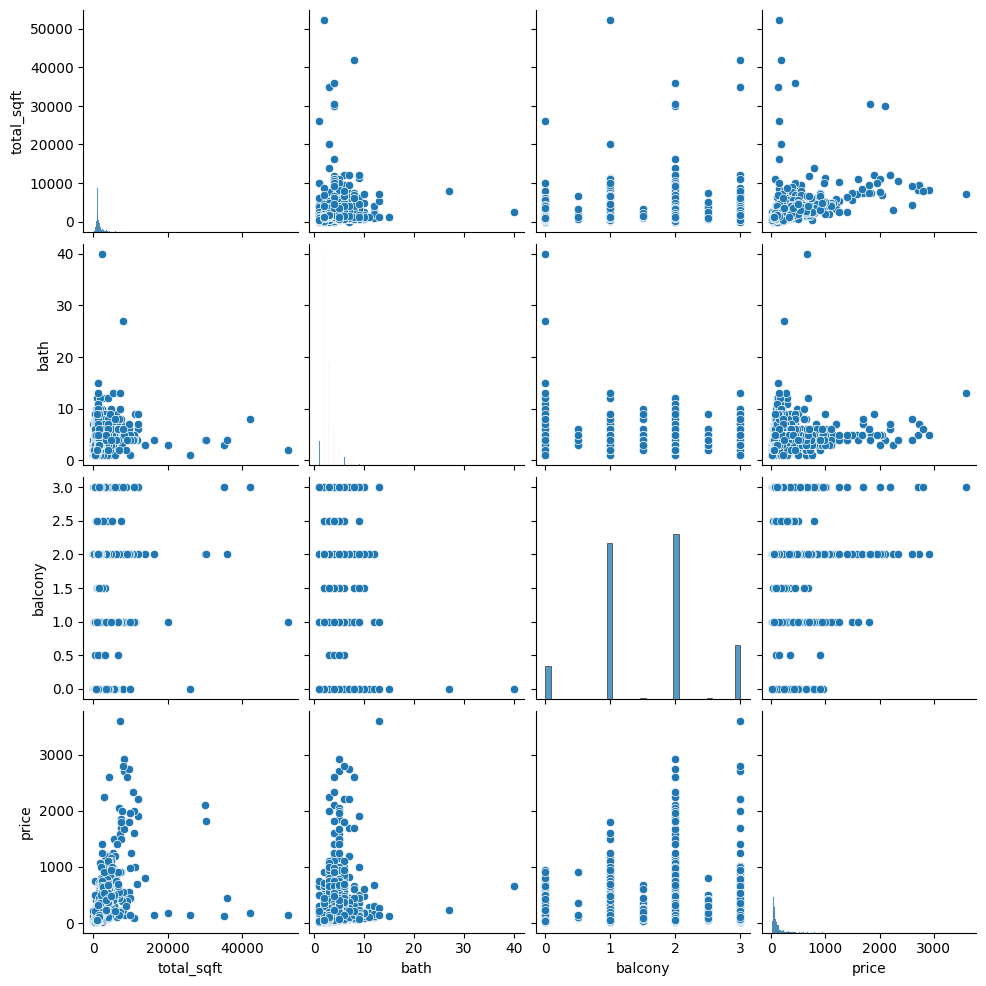

In [39]:
sns.pairplot(Bengaluru_df)

<Axes: xlabel='price', ylabel='bath'>

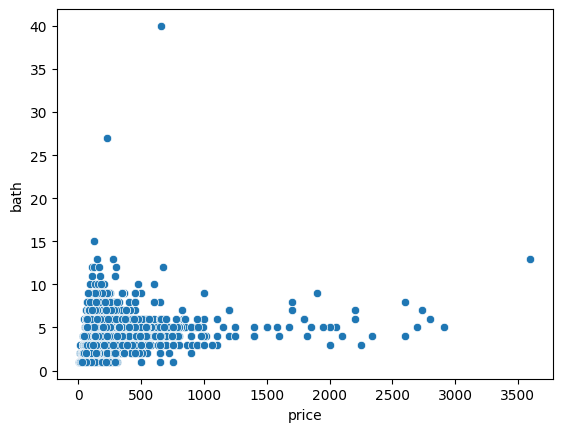

In [40]:
sns.scatterplot(x='price',y='bath',data=Bengaluru_df)

<Axes: xlabel='price', ylabel='balcony'>

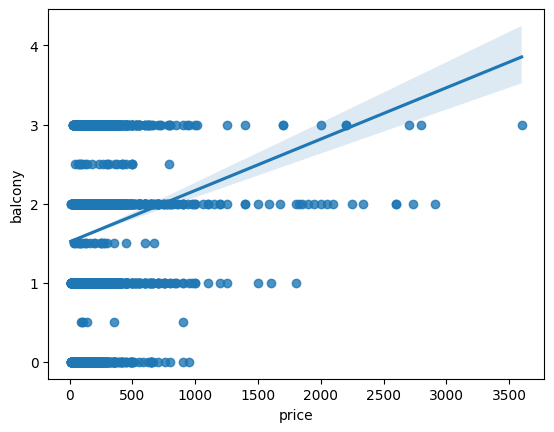

In [41]:
sns.regplot(x='price',y='balcony',data=Bengaluru_df)

<Axes: xlabel='price', ylabel='Count'>

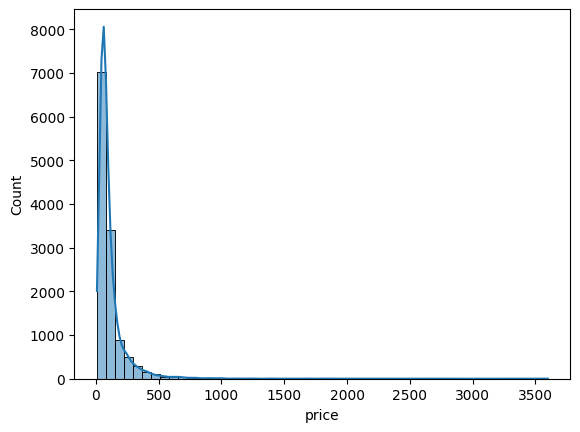

In [42]:
sns.histplot(Bengaluru_df['price'],bins=50,kde=True)


<Axes: xlabel='total_sqft', ylabel='Count'>

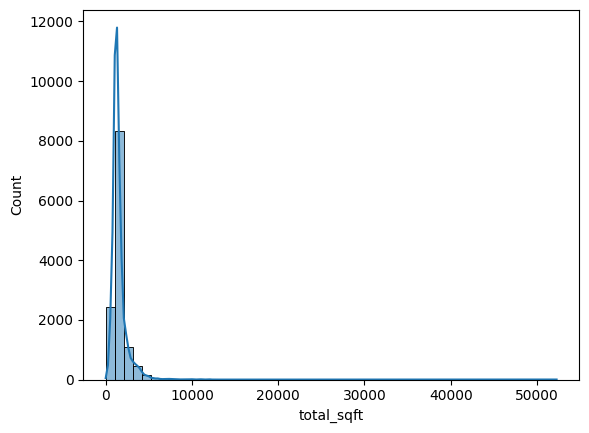

In [43]:
sns.histplot(Bengaluru_df['total_sqft'],kde=True,bins=50)


<Axes: ylabel='Density'>

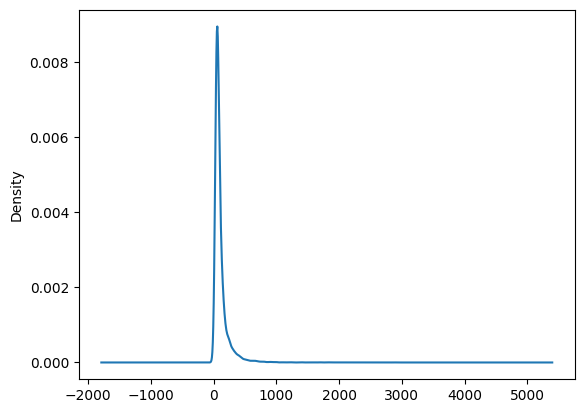

In [44]:
Bengaluru_df['price'].plot(kind='kde')


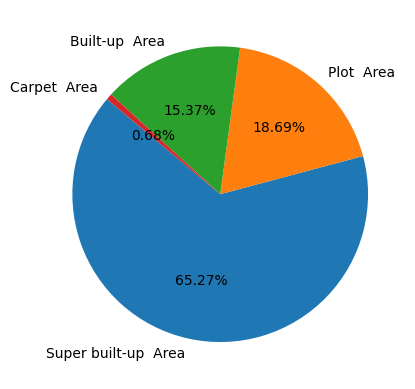

In [45]:
plt.pie(Bengaluru_df['area_type'].value_counts(),labels=Bengaluru_df['area_type'].unique(),autopct='%1.2f%%',startangle=140)
plt.show()

<Axes: xlabel='price', ylabel='total_sqft'>

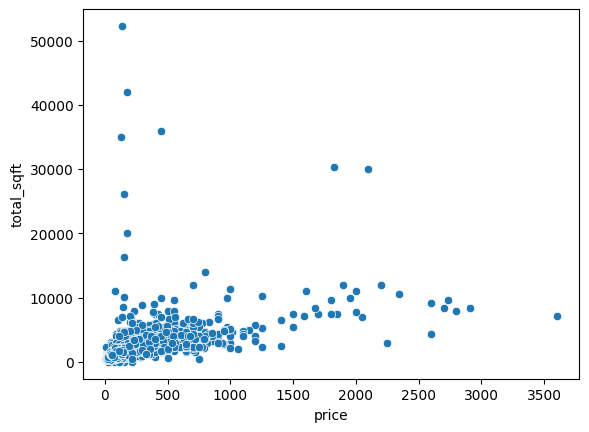

In [46]:
sns.scatterplot(x=Bengaluru_df['price'],y=Bengaluru_df['total_sqft'])

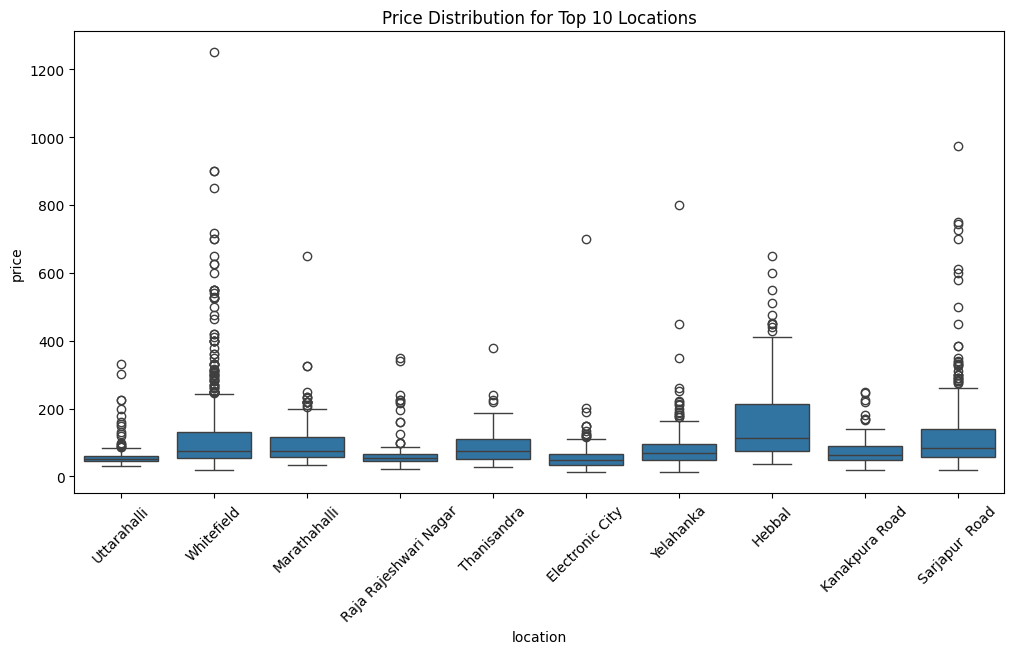

In [47]:
top_locations = Bengaluru_df['location'].value_counts().head(10).index
df_top = Bengaluru_df[Bengaluru_df['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_top['location'], y=df_top['price'])
plt.xticks(rotation=45)
plt.title("Price Distribution for Top 10 Locations")
plt.show()

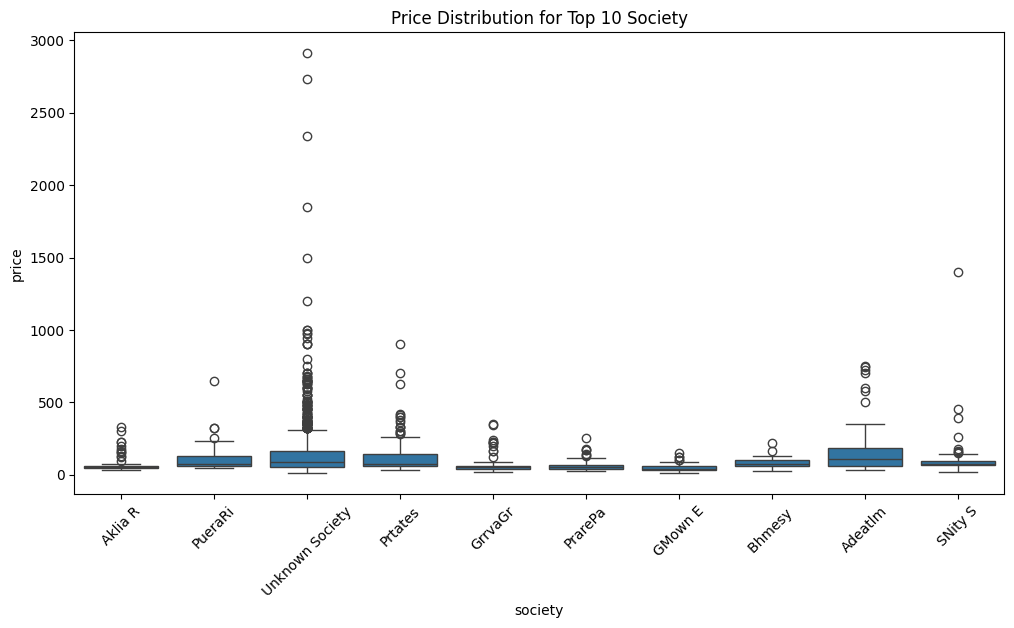

In [48]:
top_locations = Bengaluru_df['society'].value_counts().head(10).index
df_top = Bengaluru_df[Bengaluru_df['society'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_top['society'], y=df_top['price'])
plt.xticks(rotation=45)
plt.title("Price Distribution for Top 10 Society")
plt.show()

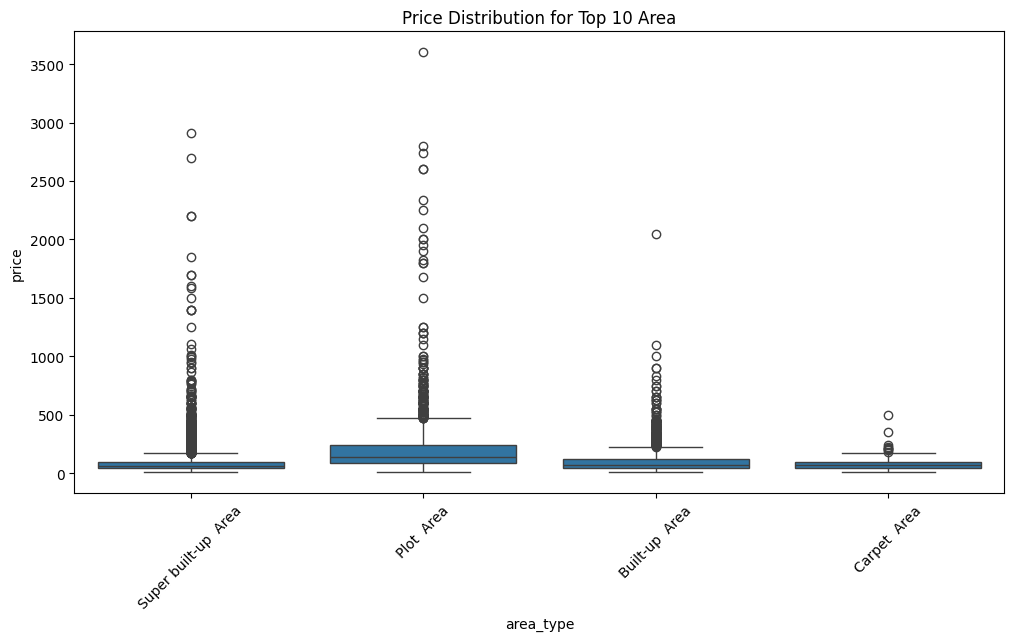

In [49]:
top_locations = Bengaluru_df['area_type'].value_counts().head(10).index
df_top = Bengaluru_df[Bengaluru_df['area_type'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_top['area_type'], y=df_top['price'])
plt.xticks(rotation=45)
plt.title("Price Distribution for Top 10 Area")
plt.show()

# Training the model

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [51]:
Bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12587 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12587 non-null  object 
 1   availability  12587 non-null  object 
 2   location      12587 non-null  object 
 3   size          12587 non-null  object 
 4   society       12587 non-null  object 
 5   total_sqft    12587 non-null  float64
 6   bath          12587 non-null  float64
 7   balcony       12587 non-null  float64
 8   price         12587 non-null  float64
dtypes: float64(4), object(5)
memory usage: 983.4+ KB


In [52]:
# Step 0: Remove Outliers Before Log Transformation
def remove_outliers(df):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]
    return df

In [53]:

# Step 1: Apply Outlier Removal
Bengaluru_df = remove_outliers(Bengaluru_df)

Bengaluru_df['price_per_sqft'] = Bengaluru_df['price'] / Bengaluru_df['total_sqft']


# Step 2: Apply Log Transformation
Bengaluru_df['price'] = np.log1p(Bengaluru_df['price'])


C:\Users\asus\AppData\Local\Temp\ipykernel_10916\1290413959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bengaluru_df['price_per_sqft'] = Bengaluru_df['price'] / Bengaluru_df['total_sqft']
C:\Users\asus\AppData\Local\Temp\ipykernel_10916\1290413959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bengaluru_df['price'] = np.log1p(Bengaluru_df['price'])


In [106]:
X = Bengaluru_df.drop(columns=['price'])
y = Bengaluru_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [108]:
num_features = ['total_sqft', 'bath', 'balcony','price_per_sqft']
cat_features = ['area_type', 'availability','size']


In [109]:
def encode_location(df):
    location_counts = df['location'].value_counts()
    return df['location'].map(location_counts).to_numpy().reshape(-1, 1)


In [110]:
def encode_society(df):
    # Count the occurrences of each society
    society_counts = df['society'].value_counts()

    # Create a mapping dictionary
    society_map = society_counts.to_dict()
    
    return df['society'].map(society_counts).to_numpy().reshape(-1, 1)



In [111]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),  # Scale numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse_output=False), cat_features),  # One-hot encode categorical features
    ('loc', FunctionTransformer(encode_location),['location'],),  # Encode location 
    ('societies',FunctionTransformer(encode_society),['society'])
],remainder='passthrough')

In [112]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=6))  # Train Model
])

In [113]:
Bengaluru_df['price']

0        3.690628
1        4.795791
2        4.143135
3        4.564348
4        3.951244
           ...   
13309    4.533996
13310    3.983599
13312    3.871201
13314    4.727388
13317    4.110874
Name: price, Length: 11369, dtype: float64

In [114]:
X_train

,area_type,availability,location,size,society,total_sqft,bath,balcony,price_per_sqft
13071,Super built-up Area,Ready To Move,BCMC Layout,3 BHK,Anair A,1369.0,2.0,3.0,0.052593
7550,Built-up Area,Ready To Move,Nagavarapalya,1 BHK,MYncysi,646.0,1.0,0.0,0.040000
5398,Built-up Area,Ready To Move,KR Puram,2 BHK,HovasTe,750.0,2.0,0.0,0.053333
4418,Built-up Area,Ready To Move,Panathur,2 BHK,Prcesvy,1000.0,2.0,1.0,0.068000
8653,Plot Area,Ready To Move,Doddaballapur,2 BHK,Vahid O,640.0,1.0,0.0,0.016406
...,...,...,...,...,...,...,...,...,...
9015,Super built-up Area,Ready To Move,Harsha Layout,1 BHK,Unknown Society,500.0,1.0,1.0,0.032000
12822,Super built-up Area,Ready To Move,Kundalahalli,3 BHK,Dieldli,1724.0,3.0,1.0,0.072506
1012,Built-up Area,Ready To Move,5th Phase JP Nagar,2 BHK,MBncele,1256.0,2.0,1.0,0.050000
5930,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,Prodsm,1630.0,3.0,2.0,0.041718


In [115]:

# 🔹 Step 7: Train Model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['total_sqft', 'bath',
                                                   'balcony',
                                                   'price_per_sqft']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['area_type', 'availability',
                                                   'size']),
                                                 ('loc',
                                                  FunctionTransformer(func=<function encode_location at 0x000001FAAF8D0180>),
                                                  ['location']),
                                                 ('societies',
                                                  FunctionTransformer(func=<function encode_society at 0x000001FAAB9CB920>),
                                                  ['society'])])),
                ('model', RandomForestRegressor(n_jobs=6, random_state=42))])

In [122]:
y_pred = pipeline.predict(X_test)


In [123]:
mean_squared_error(y_test,y_pred)

np.float64(0.0007925706299604052)

In [124]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.5f}')

R² Score: 0.99690


In [125]:
train_r2 = pipeline.score(X_train, y_train)
print(f"Train R² Score: {train_r2:.5f}")


Train R² Score: 0.99928


In [126]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Convert log-transformed predictions back to original price scale
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

# Compute MSE in original price scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
print(f'Original Scale MSE: {mse_original:.2f}')


Original Scale MSE: 15.19


In [127]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_r2}")
print(f"Average R² Score: {cv_r2.mean():.5f}")


Cross-Validation R² Scores: [0.99189822 0.99598919 0.99460133 0.99404195 0.99821762]
Average R² Score: 0.99495


In [155]:
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names.extend(transformer.get_feature_names_out(columns))
        else:
            feature_names.extend(columns)  # Use original column names if no transformation
    return feature_names

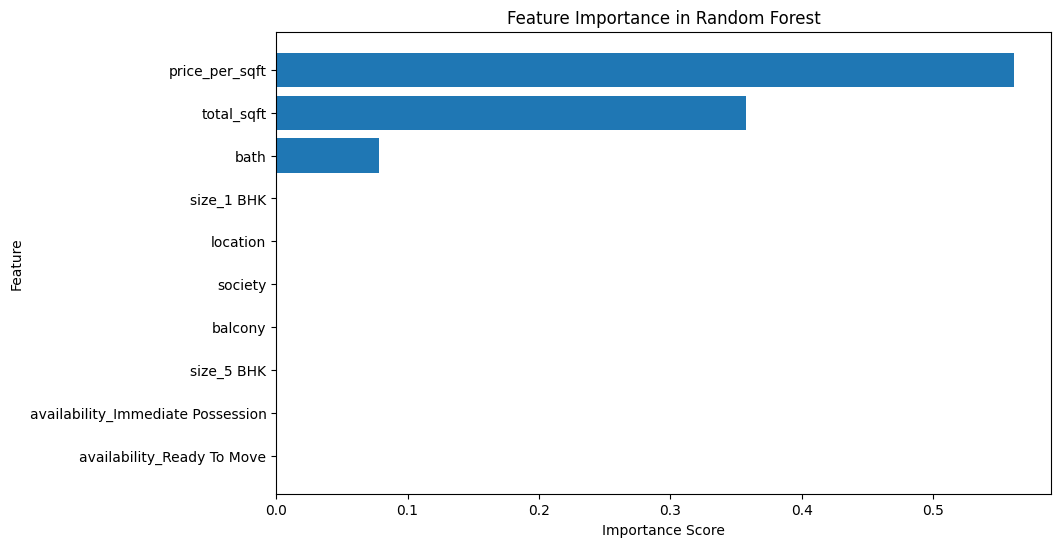

In [161]:

feature_importance = pipeline.named_steps['model'].feature_importances_
features = get_feature_names(pipeline.named_steps['preprocessor'])
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

In [168]:
import pickle


In [169]:
pickle.dump(pipeline,open('Regression_Model.pkl','wb'))

In [170]:
pickled_model = pickle.load(open('Regression_Model.pkl','rb'))